In [1]:
## env: py37

from itertools import product
import pickle
import os
import bdpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import seaborn as sns
import pandas 
import pdb
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy import ndimage
from sklearn import linear_model
from bdpy.util import makedir_ifnot
from bdpy.ml import cvindex_groupwise
from bdpy.preproc import select_top, average_sample, reduce_outlier, regressout, shift_sample
from bdpy.dataform import append_dataframe
from sklearn.metrics import mean_squared_error

In [32]:
def preprocess(dat_track):
    dat_track = dat_track.dropna(subset=['time'])
    dat_track = dat_track[dat_track["trial_type"] == 5.0]
#     remove auto-filled values
    dat_track['pos_y'] = dat_track['pos_y'].mask(np.isclose(dat_track['pos_y'].values, 786.9))
    dat_track['pos_x'] = dat_track['pos_x'].mask(np.isclose(dat_track['pos_x'].values, 1036.9))
    
    return dat_track


In [67]:
results_dir = '/home/kiss/data/fmri_shared/eyetracker/YS210201/eyetracking'
# analysis_name = 'eye_movement_train_OpenEye_test_ClosedEye.py'
results_file = os.path.join(results_dir, 'YS210201_ses01_run03.pkl')

with open(results_file, 'rb') as f:
    dat_track1 = pickle.load(f)
dat_track1 = preprocess(dat_track1)

In [118]:
pd.set_option('display.max_rows', None)
dat_track1

time_n  trigger  pos_x  pos_y  pupil  trial_type  \
1920   200649        0  521.2  310.0    5.3         5.0   
1921   200650        0  517.9  298.1    5.3         5.0   
1922   200651        0  524.8  319.8    5.3         5.0   
1923   200652        0  531.3  363.2    5.3         5.0   
1924   200653        0  526.0  394.9    5.1         5.0   
1925   200654        0  524.0  330.9    5.4         5.0   
1926   200655        0  529.3  388.6    5.2         5.0   
1927   200656        0  524.7  351.9    5.3         5.0   
1928   200657        0  530.6  386.9    5.2         5.0   
1929   200658        0  528.5  395.4    5.2         5.0   
1930   200659        0  531.1  384.4    5.2         5.0   
1931   200660        0  530.8  389.8    5.1         5.0   
1932   200661        0  540.0  338.9    5.4         5.0   
1933   200662        0  539.0  382.7    5.2         5.0   
1934   200663        0  525.8  392.0    5.1         5.0   
1935   200664        0  524.0  384.9    5.2         5.0   
1936   200665        0  527.0  380.3    5.1         5.0   
1937   200666        0  525.8  388.8    5.1         5.0   
1938   200667        0  519.9  380.2    5.1         5.0   
1939   200668        0  529.1  394.0    5.1         5.0   
1940   200669        0  525.2  381.8    5.1         5.0   
1941   200670        0  531.5  385.2    5.2         5.0   
1942   200671        0  530.5  397.2    5.0         5.0   
1943   200672        0    NaN    NaN    9.9         5.0   
1944   200673        0  531.5  383.9    5.2         5.0   
1945   200674        0  527.2  393.2    5.1         5.0   
1946   200675        0  534.1  383.4    5.1         5.0   
1947   200676        0  536.1  377.8    5.2         5.0   
1948   200677        0  531.8  381.2    5.2         5.0   
1949   200678        0  539.7  414.1    5.1         5.0   
1950   200679        0  504.5  529.0    5.1         5.0   
1951   200680        0  514.8  496.0    5.2         5.0   
1952   200681        0  512.5  512.9    5.2         5.0   
1953   200682        0  512.3  508.5    5.2         5.0   
1954   200683        0  514.9  511.4    5.2         5.0   
1955   200684        0  512.1  513.3    5.2         5.0   
1956   200685        0  519.9  507.7    5.3         5.0   
1957   200686        0  517.3  520.7    5.0         5.0   
1958   200687        0  519.1  522.2    5.2         5.0   
1959   200688        0  521.7  516.8    5.2         5.0   
1960   200689        0  518.4  523.9    5.2         5.0   
1961   200690        0  517.7  527.3    5.2         5.0   
1962   200691        0  523.4  518.8    5.2         5.0   
1963   200692        0  518.1  528.3    5.2         5.0   
1964   200693        0  519.2  525.6    5.1         5.0   
1965   200694        0  517.6  532.2    5.2         5.0   
1966   200695        0  521.2  536.4    5.2         5.0   
1967   200696        0  521.9  530.0    5.2         5.0   
1968   200697        0  521.7  524.6    5.2         5.0   
1969   200698        0  517.3  529.1    5.2         5.0   
1970   200699        0  519.9  532.2    5.1         5.0   
1971   200700        0  512.3  529.7    5.1         5.0   
1972   200701        0  519.6  534.1    5.1         5.0   
1973   200702        0  520.4  531.3    5.1         5.0   
1974   200703        0  515.6  515.8    5.1         5.0   
1975   200704        0  515.8  533.5    5.1         5.0   
1976   200705        0  512.0  523.1    5.1         5.0   
1977   200706        0  500.4  532.0    5.1         5.0   
1978   200707        0  499.4  542.3    5.0         5.0   
1979   200708        0  492.5  537.8    5.0         5.0   
1980   200709        0  498.6  537.9    5.0         5.0   
1981   200710        0  499.6  537.8    5.0         5.0   
1982   200711        0  493.6  538.8    4.9         5.0   
1983   200712        0  493.1  537.8    5.0         5.0   
1984   200713        0  499.7  544.2    5.0         5.0   
1985   200714        0  495.1  527.1    4.9         5.0   
1986   200715        0  492.3  527.6    5.0         5.

In [4]:
results_dir = '/home/kiss/data/fmri_shared/eyetracker/YS210201/eyetracking'
# analysis_name = 'eye_movement_train_OpenEye_test_ClosedEye.py'
results_file = os.path.join(results_dir, 'YS210201_ses01_run04.pkl')

with open(results_file, 'rb') as f:
    dat_track2 = pickle.load(f)
dat_track2 = preprocess(dat_track2)
dat_track2.shape

(12000, 14)

In [5]:
dat = pd.concat( [dat_track1, dat_track2], axis=0 )
dat.shape

(24000, 14)

In [121]:
# dat_track1

In [74]:
# dat_track1['pos_y'] = dat_track1['pos_y'].mask(np.isclose(dat_track1['pos_y'].values, 786.9))
# dat_track1['pos_x'] = dat_track1['pos_x'].mask(np.isclose(dat_track1['pos_x'].values, 1036.9))
# dat_track1.replace(1036.9, 0)
# dat_track1['pos_y'].replace({786.9: 0})
# dat_track1[2060:2080]

In [75]:
# np.random.seed(123)
# df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
# print(df.head(n=1))



In [110]:
# df = df.mask(np.isclose(df.values, 0.997345))

In [115]:
# dat_track1['pos_x'].replace({1036.9: None})
# dat_track1['pos_y'].replace({786.9: None})
# dat_track1.iloc[2080]

True

In [81]:
dat['pos_x'].values.shape[0]

24000

# Linreg with filter

In [82]:
# Filter noise
import scipy.signal as sig
N = dat['pos_x'].values.shape[0] #200
f = 1.0/2
y =  dat['pos_x'].values


filt = True
if filt :
    cutoff = int(N*f*1.5)
    yrms1 = (y**2).mean()**.5
    yF = np.fft.fft(y)
    yF[cutoff:]=0               # Filter
    y = np.real(np.fft.ifft(yF))
    yrms2 = (y**2).mean()**.5   # Keep signal energy
    y *= yrms1/yrms2

# Calculate envelope
envelope = np.abs(sig.hilbert(y))

In [6]:
from sklearn.linear_model import LinearRegression
#         classification_acc = []
#         classification_acc_tr = []

x_train = []
x_test = []
y_train = []
y_test = []



x_train = dat['pos_x']
# x_train = x_train.reshape(-1, 1)
y_train = dat['fp_pos_pix_x']

# model = linear_model.Lasso(alpha=0.1)
model = LinearRegression()
#             model.fit(x_train, y_train.astype('int'))
model.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

print(model.coef_, model.intercept_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Text(0.5, 1.0, 'eye-tracker_raw')

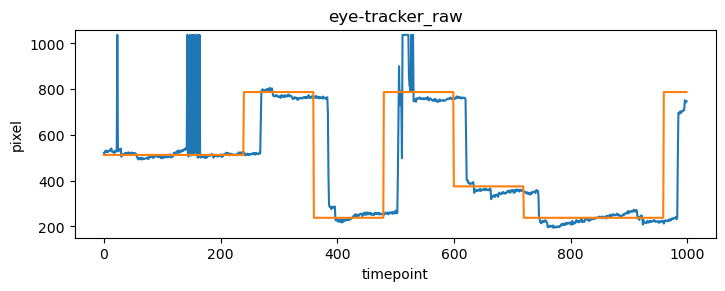

In [27]:
x_train = dat_track1['pos_x']
# x_train = x_train.reshape(-1, 1)
y_train = dat_track1['fp_pos_pix_x']


fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( x_train[0:1000].values, label = "eye-tracker_raw")
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values, label = "fixation")
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_raw")

Text(0.5, 1.0, 'eye-tracker_remove_bad_data')

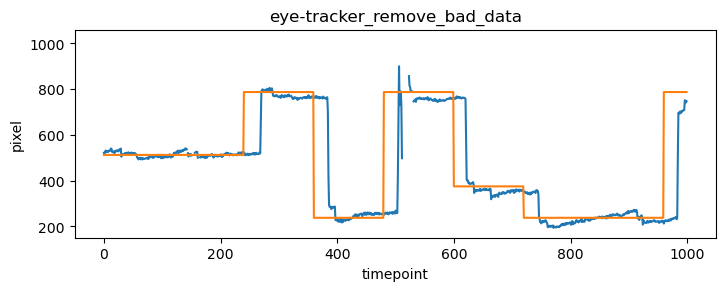

In [28]:
from sklearn.impute import KNNImputer

x_train = dat['pos_x']
# x_train = x_train.reshape(-1, 1)
y_train = dat['fp_pos_pix_x']


# imputer = KNNImputer(n_neighbors=10)
# # print(imputer.fit_transform(x_train.values.reshape(-1, 1)))

# x_train = imputer.fit_transform(x_train.values.reshape(-1, 1))

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( x_train[0:1000].values, label = "eye-tracker_raw")
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values, label = "fixation")
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_remove_bad_data")


Text(0.5, 1.0, 'eye-tracker_knn_impute')

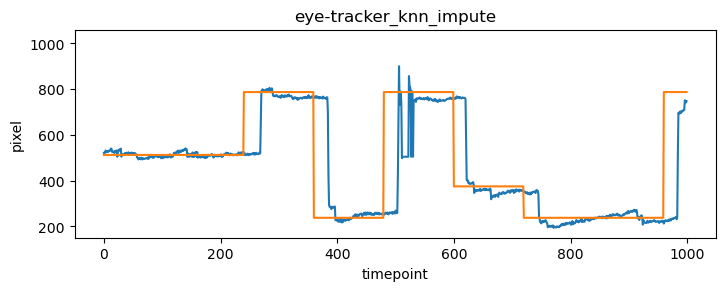

In [30]:
# knn imputer
from sklearn.impute import KNNImputer

x_train = dat['pos_x']
# x_train = x_train.reshape(-1, 1)
y_train = dat['fp_pos_pix_x']


imputer = KNNImputer(n_neighbors=10)
# print(imputer.fit_transform(x_train.values.reshape(-1, 1)))

dat['x_knn'] = imputer.fit_transform(x_train.values.reshape(-1, 1))
x_knn = dat['x_knn']

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

# plt.plot( x_train[0:600].values)
plt.plot( x_knn[0:1000].values)
plt.plot( y_train[0:1000].values)
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_knn_impute")

Text(0.5, 1.0, 'eye-tracker_linear_interpolation')

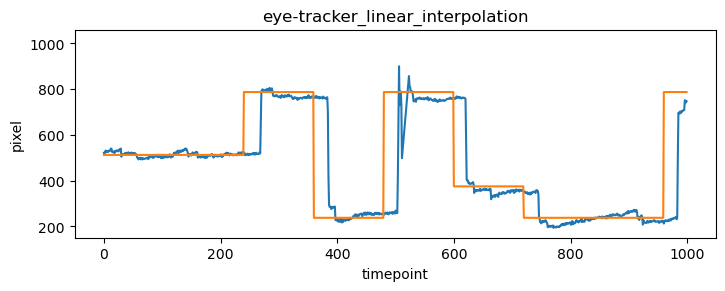

In [69]:
# spline interpolate

x_spline = dat_track1['pos_x'].interpolate('spline',order=1)
# x_train = x_train.reshape(-1, 1)
y_train = dat_track1['fp_pos_pix_x']



# df.interpolate('spline',limit=5)
# x_train = imputer.fit_transform(x_train.values.reshape(-1, 1))

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( x_spline[0:1000].values)
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values)
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_linear_interpolation")

Text(0.5, 1.0, 'eye-tracker_lowpass_filter_after_linear')

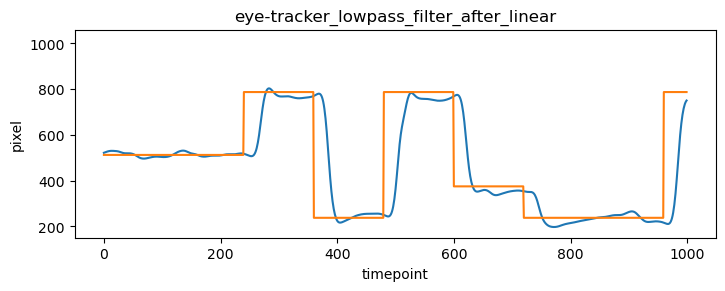

In [71]:
# butter lowpass filter

from scipy.signal import butter,filtfilt
# from fbprophet.plot import plot_plotly
# import plotly.graph_objs as go
# Filter requirements.
fs = 60.0       # sample rate, Hz
T = dat_track1['pos_x'].shape[0]/fs        # Sample Period
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# signal_data = dat_track1['pos_x'].values.reshape(-1, 1)
# # x_train = x_train.reshape(-1, 1)
# y_train = dat_track1['fp_pos_pix_x'].values.reshape(-1, 1)
y_lowpass_sp = butter_lowpass_filter(x_spline, cutoff, fs, order)

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( y_lowpass_sp[0:1000])
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values)
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_lowpass_filter_after_linear")

Text(0.5, 1.0, 'eye-tracker_lowpass_filter_after_knn')

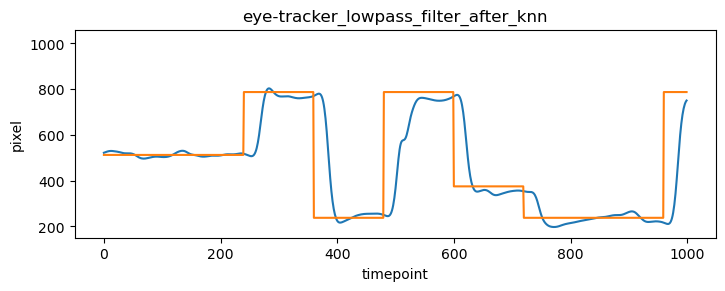

In [48]:
# butter lowpass filter

from scipy.signal import butter,filtfilt
# from fbprophet.plot import plot_plotly
# import plotly.graph_objs as go
# Filter requirements.

T = dat_track1['pos_x'].shape[0]/fs        # Sample Period
fs = 60.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# signal_data = dat_track1['pos_x'].values.reshape(-1, 1)
# # x_train = x_train.reshape(-1, 1)
# y_train = dat_track1['fp_pos_pix_x'].values.reshape(-1, 1)
y_lowpass_knn = butter_lowpass_filter(x_knn, cutoff, fs, order)

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( y_lowpass_knn[0:1000])
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values)
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_lowpass_filter_after_knn")

In [77]:
# signal_data

In [76]:
# y_lowpass_sp.shape

Text(0.5, 1.0, 'eye-tracker_hilbert_filter_after_spline')

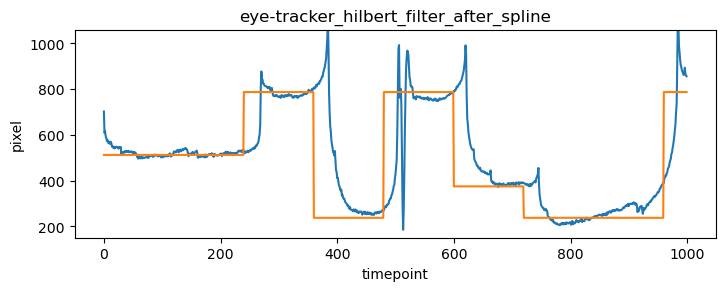

In [37]:
from scipy import signal

signal_data = x_spline
# x_train = x_train.reshape(-1, 1)
# y_train = dat_track1['fp_pos_pix_x'].values.reshape(-1, 1)
amplitude_envelope = np.abs(signal.hilbert(signal_data))

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( amplitude_envelope[0:1000])
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values)
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_hilbert_filter_after_spline")

Text(0.5, 1.0, 'eye-tracker_hilbert_filter_after_linear')

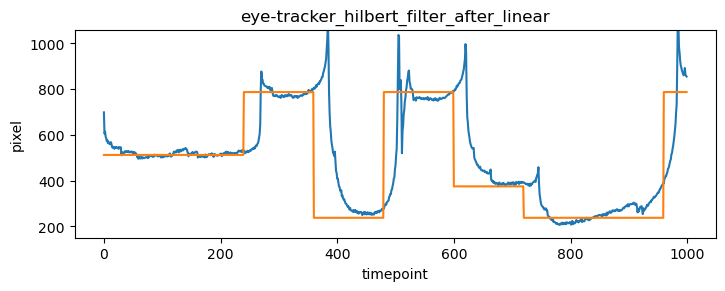

In [72]:
from scipy import signal

signal_data = x_spline
# x_train = x_train.reshape(-1, 1)
# y_train = dat_track1['fp_pos_pix_x'].values.reshape(-1, 1)
amplitude_envelope = np.abs(signal.hilbert(signal_data))

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( amplitude_envelope[0:1000])
# plt.plot( x_train[0:600])
plt.plot( y_train[0:1000].values)
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.title("eye-tracker_hilbert_filter_after_linear")

Text(0.5, 1.0, 'eye-tracker_hilbert_filter_after_knn')

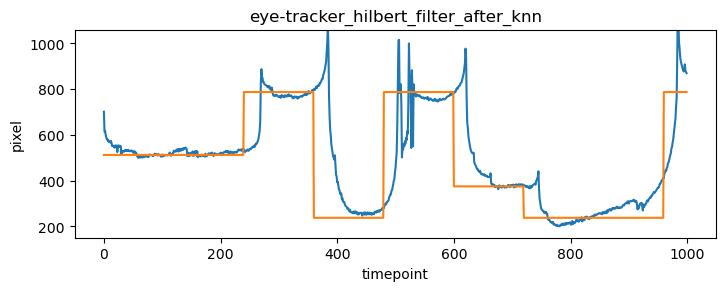

In [38]:
from scipy import signal

signal_data = x_knn
# x_train = x_train.reshape(-1, 1)
# y_train = dat_track1['fp_pos_pix_x'].values.reshape(-1, 1)
amplitude_envelope = np.abs(signal.hilbert(signal_data))

fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)

plt.plot( amplitude_envelope[0:1000])
# plt.plot( x_train[0:600])
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.plot( y_train[0:1000].values)
plt.title("eye-tracker_hilbert_filter_after_knn")


In [79]:
# signal_data

In [78]:
# amplitude_envelope

Text(0.5, 1.0, 'eye-tracker_fill_in_value_spline_lowpass_filter')

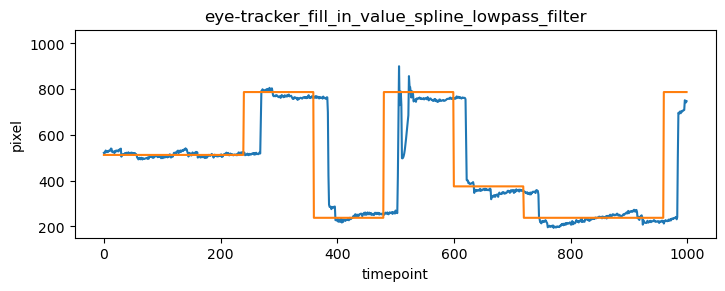

In [63]:
i_count = 0

x_train = dat_track1['pos_x'].values
for i in range(x_train.shape[0]):
    if x_train[i] > 0:
        i_count += 1
    else:
        x_train[i] = y_lowpass_sp[i]
fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)
plt.plot( x_train[0:1000])
# plt.plot( x_train[0:600])
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.plot( y_train[0:1000].values)
plt.title("eye-tracker_fill_in_value_spline_lowpass_filter")

Text(0.5, 1.0, 'eye-tracker_fill_in_value_linear_lowpass_filter')

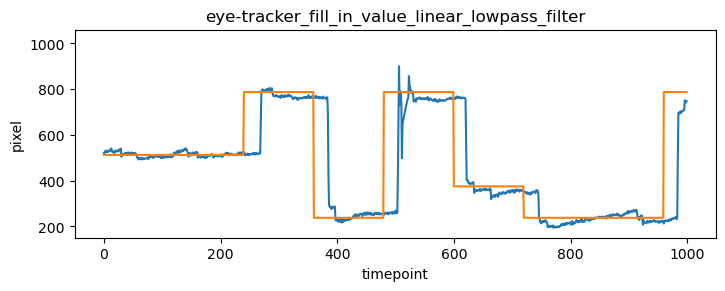

In [73]:
i_count = 0

x_train = dat_track1['pos_x'].values
for i in range(x_train.shape[0]):
    if x_train[i] > 0:
        i_count += 1
    else:
        x_train[i] = y_lowpass_sp[i]
fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)
plt.plot( x_train[0:1000])
# plt.plot( x_train[0:600])
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.plot( y_train[0:1000].values)
plt.title("eye-tracker_fill_in_value_linear_lowpass_filter")

In [80]:
# i_count

Text(0.5, 1.0, 'eye-tracker_fill_in_value_KNN_lowpass_filter')

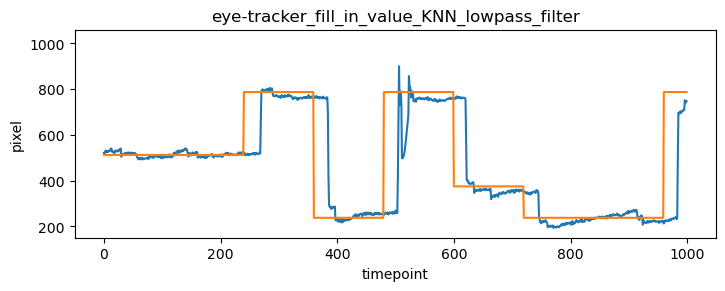

In [65]:
i_count = 0

x_train = dat_track1['pos_x'].values
for i in range(x_train.shape[0]):
    if x_train[i] > 0:
        i_count += 1
    else:
        x_train[i] = y_lowpass_knn[i]
fig = plt.figure(figsize=(8.27, 8.27/3), dpi=100)
plt.plot( x_train[0:1000])
# plt.plot( x_train[0:600])
plt.xlabel("timepoint")
plt.ylabel("pixel")
plt.ylim([150,1060])
plt.plot( y_train[0:1000].values)
plt.title("eye-tracker_fill_in_value_KNN_lowpass_filter")

# Not used

In [17]:
# temp_dat = dat_track2.query('fixation_point_position_x == 0 & fixation_point_position_y == 0 &time<60')
temp_dat = dat_track2.query('32<time<=42')
temp_dat

time_n  trigger  pos_x  pos_y  pupil  trial_type  \
1921  217731        0  519.4  358.2    5.3         5.0   
1922  217732        0  523.4  365.8    5.2         5.0   
1923  217733        0  604.9  194.3    5.7         5.0   
1924  217734        0  579.3  230.0    5.6         5.0   
1925  217735        0  529.0  307.3    5.3         5.0   
...      ...      ...    ...    ...    ...         ...   
2516  218326        0  535.6  165.5    5.6         5.0   
2517  218327        0  540.7  158.3    5.6         5.0   
2518  218328        1  533.1  166.4    5.5         5.0   
2519  218329        0  531.6  162.0    5.6         5.0   
2520  218330        0  537.7  160.5    5.6         5.0   

      fixation_point_position_x  fixation_point_position_y  direction  \
1921                       -6.0                        0.0        0.0   
1922                       -6.0                        0.0        0.0   
1923                       -6.0                        0.0        0.0   
1924                       -6.0                        0.0        0.0   
1925                       -6.0                        0.0        0.0   
...                         ...                        ...        ...   
2516                        0.0                       -6.0        0.0   
2517                        0.0                       -6.0        0.0   
2518                        0.0                       -6.0        0.0   
2519                        0.0                       -6.0        0.0   
2520                        0.0                        3.0        0.0   

      eye_closed  dense_fp       time  fp_pos_pix_x  fp_pos_pix_y  
1921         0.0       1.0  32.016667    237.079731    384.000000  
1922         0.0       1.0  32.033333    237.079731    384.000000  
1923         0.0       1.0  32.050000    237.079731    384.000000  
1924         0.0       1.0  32.066667    237.079731    384.000000  
1925         0.0       1.0  32.083333    237.079731    384.000000  
...          ...       ...        ...           ...           ...  
2516         0.0       1.0  41.933333    512.000000    110.807059  
2517         0.0       1.0  41.950000    512.000000    110.807059  
2518         0.0       1.0  41.966667    512.000000    110.807059  
2519         0.0       1.0  41.983333    512.000000    110.807059  
2520         0.0       1.0  42.000000    512.000000    520.596471  

[600 rows x 14 columns]

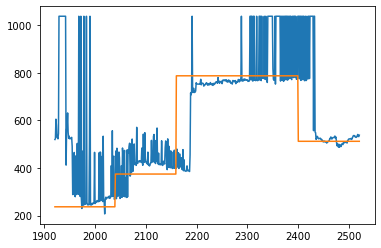

In [31]:
signal_data = temp_dat['pos_x'].to_list()
raw_fix = temp_dat['fp_pos_pix_x'].to_list()

plt.plot( temp_dat['pos_x'])
plt.plot( temp_dat['fp_pos_pix_x'])

In [71]:
from scipy.signal import butter,filtfilt
# from fbprophet.plot import plot_plotly
# import plotly.graph_objs as go
# Filter requirements.

T = 10.0         # Sample Period
fs = 60.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [72]:
# Filter the data, and plot both the original and filtered signals.
signal_data = temp_dat['pos_x'].to_list()
y_lowpass = butter_lowpass_filter(signal_data, cutoff, fs, order)
# fig = go.Figure()
# fig.add_trace(go.Scatter(
#             y = data,
#             line =  dict(shape =  'spline' ),
#             name = 'signal with noise'
#             ))
# fig.add_trace(go.Scatter(
#             y = y,
#             line =  dict(shape =  'spline' ),
#             name = 'filtered signal'
#             ))
# fig.show()

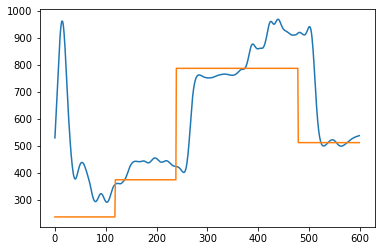

In [74]:
plt.plot( y_lowpass)
plt.plot( raw_fix)

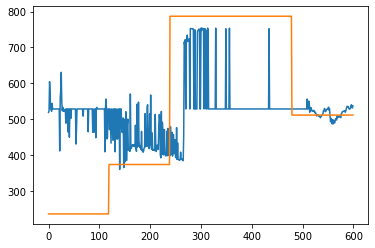

In [40]:
def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal.to_list()

median_filtered = get_median_filtered(temp_dat['pos_x'], threshold=1)

plt.plot(median_filtered)
plt.plot(raw_fix)

In [48]:
def detect_outlier_position_by_fft(signal, threshold_freq=0.1,
                                   frequency_amplitude=.001):
    signal = signal.copy()
    fft_of_signal = np.fft.fft(signal)
    outlier = np.max(signal) if abs(np.max(signal)) > abs(np.min(signal)) else np.min(signal)
    if np.any(np.abs(fft_of_signal[threshold_freq:]) > frequency_amplitude):
        index_of_outlier = np.where(signal == outlier)
        return index_of_outlier[0]
    else:
        return None
    
# fft_filtered = detect_outlier_position_by_fft(temp_dat['pos_x'], threshold=1)


outlier_idx = []

y = temp_dat['pos_x'].values

opt = dict(threshold_freq=0.01, frequency_amplitude=0.001)

win = 20
for k in range(win*2, y.size, win):
    idx = detect_outlier_position_by_fft(y[k-win:k+win], **opt)
    if idx is not None:
        outlier_idx.append(k + idx[0] - win)
fft_filtered = list(set(outlier_idx))


plt.plot(fft_filtered)
plt.plot(raw_fix)

TypeError: slice indices must be integers or None or have an __index__ method

In [47]:
idx

NameError: name 'idx' is not defined

In [43]:
y = temp_dat['pos_x'].values
y

array([ 519.4,  523.4,  604.9,  579.3,  529. ,  528. ,  522.4,  544.7,
       1036.9, 1036.9, 1036.9, 1036.9, 1036.9, 1036.9, 1036.9, 1036.9,
       1036.9, 1036.9, 1036.9, 1036.9, 1036.9, 1036.9,  412.1,  562. ,
        579.2,  631. ,  550.3,  524.2,  533.6,  522.5,  523.9,  523.4,
        526. ,  528.5,  489.5,  288.4,  289.7,  293.2,  465.2,  284.4,
        279.5,  450.5,  288.4,  293.4,  503.2,  290.7,  290.2, 1036.9,
        291.4,  284.1,  280.3, 1036.9,  273.7,  230. ,  431.4,  471.2,
        244.2, 1036.9,  246.3,  249.8,  248.8,  250.9, 1036.9,  255.9,
        245.6,  245.6,  246.5,  245.3,  509. , 1036.9,  245.3,  248. ,
        245.1,  251.8,  247.1,  252.4,  252.1,  251.6,  465.6,  250.6,
        256.4,  255.2,  259.7,  263.3,  258.4,  261.8,  258.7,  463.9,
        259.8,  467.1,  464.6,  263.8,  267.9,  448.9,  259.2,  533.3,
        260.5,  255.4,  207.2,  267.4,  277.2,  269.4,  275. ,  277.3,
        275.4,  274.4,  276.9,  282.3,  272.4,  276. ,  278.5,  409.8,
      

In [59]:
from scipy import signal
amplitude_envelope = np.abs(signal.hilbert(temp_dat['pos_x'].values))
amplitude_envelope2 = np.abs(signal.hilbert(y))


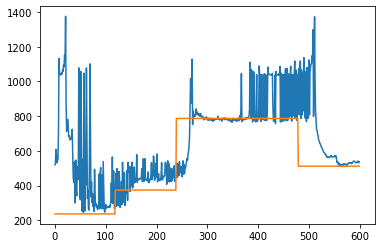

In [51]:
plt.plot(amplitude_envelope)
plt.plot(raw_fix)

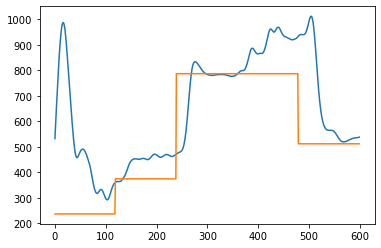

In [60]:
plt.plot(amplitude_envelope2)
plt.plot(raw_fix)

In [68]:
# Filter noise
import scipy.signal as sig
N = 200
f = 1.0/2
y = temp_dat['pos_x'].values


filt = True
if filt :
    cutoff = int(N*f*1.5)
    yrms1 = (y**2).mean()**.5
    yF = np.fft.fft(y)
    yF[cutoff:]=0               # Filter
    y = np.real(np.fft.ifft(yF))
    yrms2 = (y**2).mean()**.5   # Keep signal energy
    y *= yrms1/yrms2

# Calculate envelope
envelope = np.abs(sig.hilbert(y));

/home/yqsong/.conda/envs/song_py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


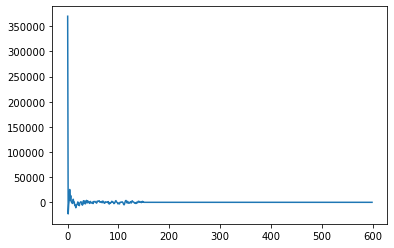

In [78]:
plt.plot(yF)

In [76]:
cutoff

2

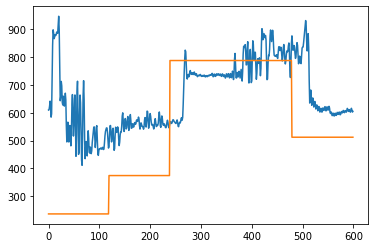

In [69]:
plt.plot(envelope)
plt.plot(raw_fix)

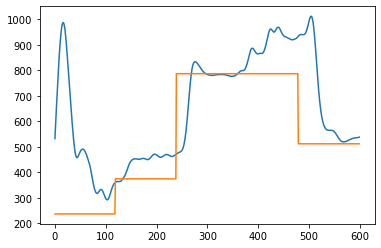

In [75]:

envelope2 = np.abs(sig.hilbert(y_lowpass))
plt.plot(envelope2)
plt.plot(raw_fix)

# Test GazeParser

In [8]:
import GazeParser.Converter

GazeParser: ConfigDir is successfully created.
/home/yqsong/.conda/envs/song_py37/lib/python3.7/site-packages/GazeParser-0.11.1-py3.7.egg/GazeParser/GazeParser.cfg -> /home/yqsong/.GazeParser/GazeParser.cfg
/home/yqsong/.conda/envs/song_py37/lib/python3.7/site-packages/GazeParser-0.11.1-py3.7.egg/GazeParser/TrackingTools.cfg -> /home/yqsong/.GazeParser/TrackingTools.cfg


In [20]:
model.coef_

array([[0.40126804]])

In [ ]:
model.intercept_

In [8]:
# x_train = []
# x_test = []
# y_train = []
# y_test = []

# x_train = dat['pos_y']
# # x_train = x_train.reshape(-1, 1)
# y_train = dat['fp_pos_pix_y']

# model = linear_model.Lasso(alpha=0.1)
# #             model.fit(x_train, y_train.astype('int'))
# model.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# filename = 'correction_model_y.sav'
# pickle.dump(model, open(filename, 'wb'))